In [5]:
import pandas as pd
import numpy as np


In [6]:
df=pd.read_excel("ABC Company.xlsx")


In [7]:
df.head(0)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


In [8]:
#Correct the data in the "height" column by replacing it with random
#numbers between 150 and 180. Ensure data consistency and integrity
#before proceeding with analysis.
df["Height"] = np.random.randint(150, 181, size=len(df))
df["Height"] = df["Height"].astype(int)
assert df["Height"].between(150, 180).all()
df.to_excel("ABC Company.xlsx", index=False)


In [9]:
#Determine the distribution of employees across each team and calculate
#the percentage split relative to the total number of employees.
team_counts = df["Team"].value_counts()
team_percentages = (team_counts / len(df)) * 100
distribution = pd.DataFrame({
    "employee_count": team_counts,
    "percentage": team_percentages.round(2)
})
distribution

,employee_count,percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
Milwaukee Bucks,16,3.49
New York Knicks,16,3.49
Boston Celtics,15,3.28
Los Angeles Clippers,15,3.28
Los Angeles Lakers,15,3.28
Phoenix Suns,15,3.28


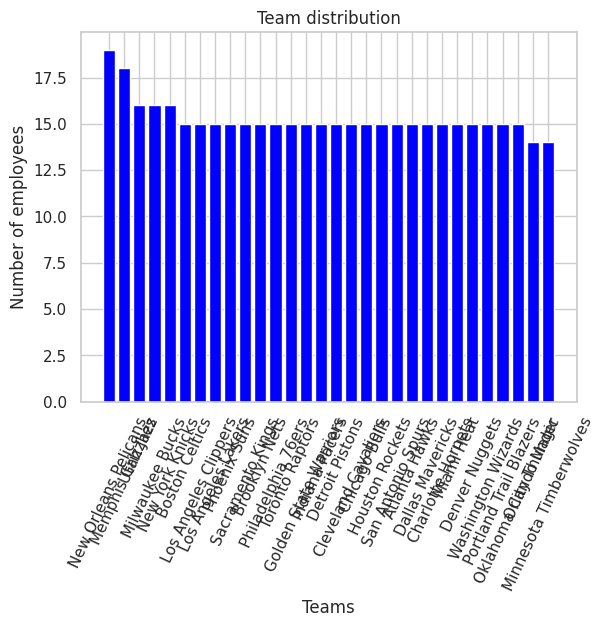

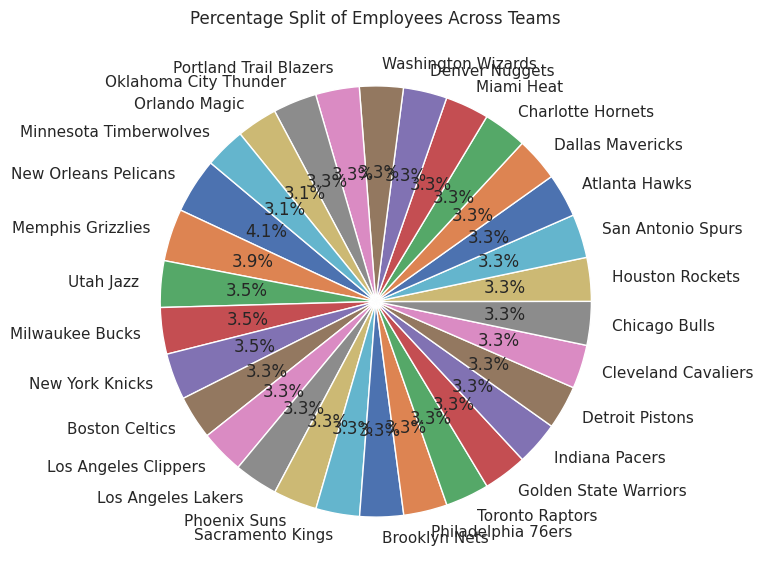

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.bar(distribution.index,distribution['employee_count'],color='blue')
plt.title("Team distribution")
plt.xlabel("Teams")
plt.xticks(rotation=65)
plt.ylabel("Number of employees")
plt.show()
plt.figure(figsize=(7,7))
plt.pie(distribution["percentage"],labels=distribution.index,autopct="%1.1f%%",
        startangle=140)

plt.title("Percentage Split of Employees Across Teams")
plt.show()

In [11]:
#Segregate employees based on their positions within the company.
position_groups = df.groupby("Position")
position_counts = df["Position"].value_counts()
position_counts

,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


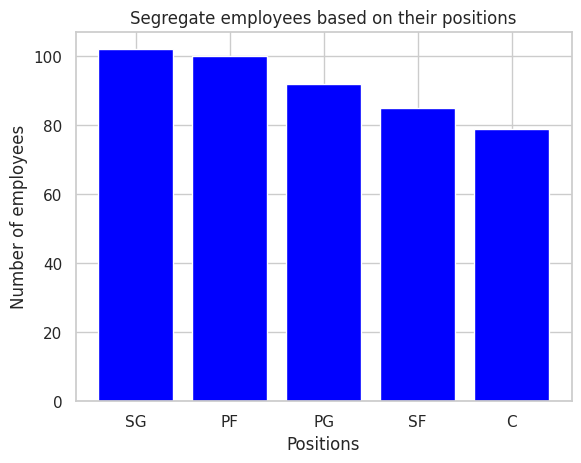

In [18]:
plt.bar(position_counts.index,position_counts,color='blue')
plt.title("Segregate employees based on their positions")
plt.xlabel("Positions")
plt.ylabel("Number of employees")
plt.show()

In [13]:
#Identify the predominant age group among employees.
bins = [18, 25, 35, 45, 55]
labels = ["18–25", "26–35", "36–45", "46–55"]
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)
age_group_counts = df["age_group"].value_counts().sort_index()
predominant_age_group = age_group_counts.idxmax()
print(age_group_counts)
print("Predominant age group:", predominant_age_group)

age_group
18–25    200
26–35    235
36–45     23
46–55      0
Name: count, dtype: int64
Predominant age group: 26–35


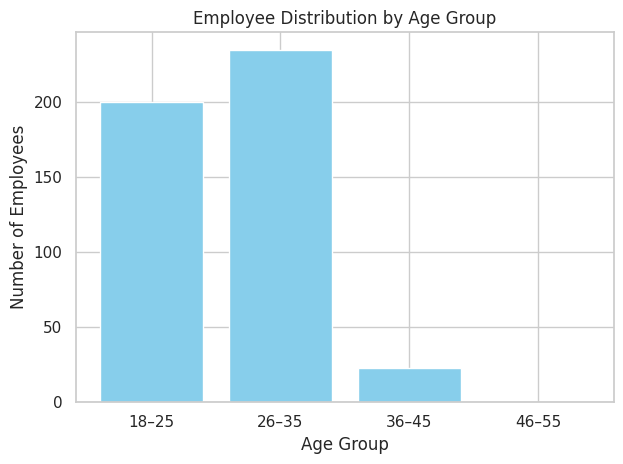

In [21]:
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color="skyblue")
plt.title("Employee Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

In [14]:
#Discover which team and position have the highest salary expenditure.
position_salary = df.groupby("Position")["Salary"].sum()
team_salary = df.groupby("Team")["Salary"].sum()
highest_salary_position = position_salary.idxmax()
highest_salary_position_value = position_salary.max()
print("Position with highest salary expenditure:", highest_salary_position, highest_salary_position_value)
highest_salary_team = team_salary.idxmax()
highest_salary_value = team_salary.max()
print("Team with highest salary expenditure:", highest_salary_team)

Position with highest salary expenditure: C 466377332.0
Team with highest salary expenditure: Cleveland Cavaliers


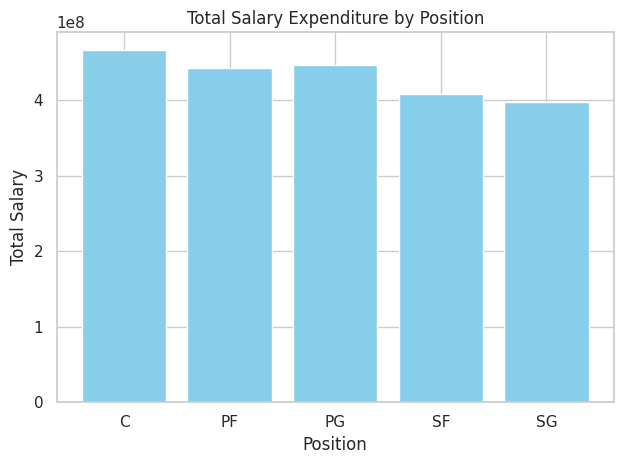

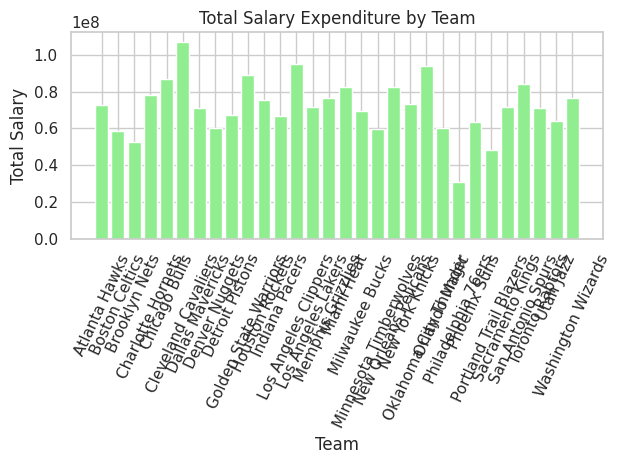

In [27]:
plt.bar(position_salary.index, position_salary.values, color="skyblue")

plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.tight_layout()
plt.show()

plt.bar(team_salary.index, team_salary.values, color="lightgreen")

plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3810978546.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Age", y="Salary",palette='coolwarm')


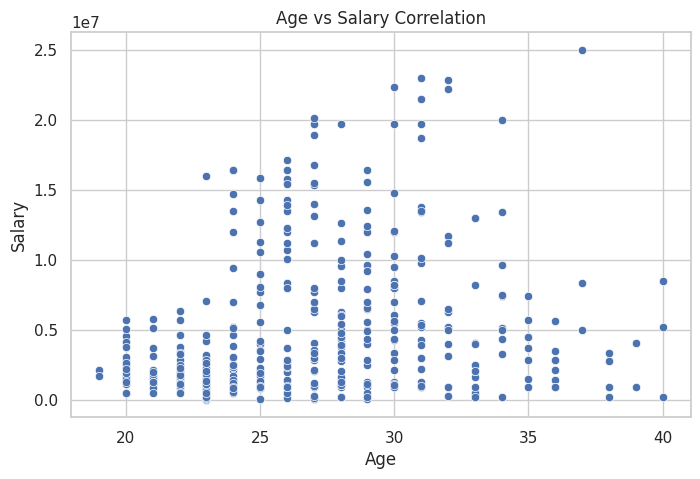

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Salary",palette='coolwarm')
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.show()

As age increases, salary tends to increase due to many other factors (experience, role, education, department, tenure, performance) affect salary more strongly.The relationship is not strong; age explains only a small portion of salary variation.



*   Position SG are the most common role.
*   Position C are the most expensive role despite smaller numbers


*   Cleveland Cavaliers have the highest salary expenditure among teams.
*   The organization has a predominantly mid-career workforce (26–35).



